In [ ]:
%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np
from mpl_interactions import interactive_plot, interactive_plot_factory
import ipywidgets as widgets

# Interactive line plots


## Simplest example

Here is an example with no extra arguments or styling so that the example looks nice and compact + simple.

In [ ]:
x = np.linspace(0,np.pi,100)
τ = np.linspace(1,10,100)
β = np.linspace(1,10,100)
def f(x, τ, β):
    return np.sin(x*τ)*x**β
fig, ax, sliders = interactive_plot(f, x=x, τ = τ, β = β)

### Troubleshooting
If instead of a plot you got an output that looks like this:
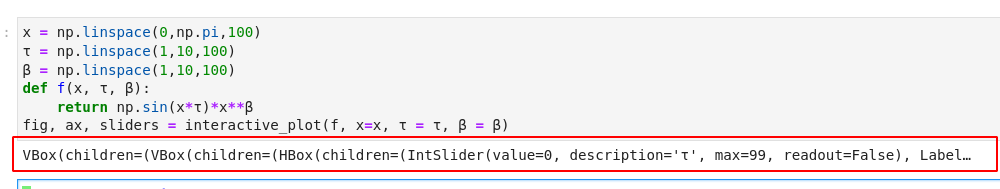  
and you are using jupyterlab then you probably need to install jupyterlab-manager:
```bash
conda install -c conda-forge nodejs=12
jupyter labextension install @jupyter-widgets/jupyterlab-manager
```
after the install and finishes refresh the browser page and it should work

## With multiple functions + showcase automatic legend

You can compare multiple functions by providing a list of functions. If you do not explicitly provide a label the name of the function will be used as the label so you can still differentiate them in a legend.

In [ ]:

x = np.linspace(0,np.pi,100)
τ = np.linspace(.5, 10, 100)
β = np.linspace(1, 10, 100)
def f1(x, τ, β):
    return np.sin(x*τ)*x*β
def f2(x, τ, β):
    return np.sin(x*β)*x*τ
fig, ax, sliders = interactive_plot([f1, f2], x=x, τ = τ, β = β)
plt.legend()

## Styling of plot

You can either use the figure and axis objects returned by the function, or if the figure is the current active figure the standard `plt.__` commands should work as expected. You can also provide explict plot_kwargs to the `plt.plot` command that is used internally using the plot_kwargs argument

You can control how `xlim`/`ylim`s behave using the `x_scale`/`y_scale` arguments. The options are:
1. `stretch`
    - never shrink the x/y axis but will expand it to fit larger values
2. `auto`
    - autoscale the x/y axis for every plot update
3. `fixed`
    - always used the initial values of the limits
4. a tuple
    - You can pass a value such as `[-4,5]` to have the limits not be updated by moving the sliders.
    
    
### Title

You can make the title auto update with information about the values by using the `title` argument. Just use the name of one of the parameters as in a format specifier in the string. e.g. to put the value of `τ` in and round it to two decimals use the following title string: `'τ:.2f'`

In [ ]:
x = np.linspace(0,np.pi,100)
τ = np.linspace(1,10,100)
def f(τ):
    return [np.sin(x*τ)*x**τ, x*τ]
interactive_plot(f,τ=τ,x_scale='stretch',y_scale='auto',plot_kwargs={'label':'interactive!'}, title='the value of τ is: {τ:.2f}')

#you can still use plt commands if this is the active figure
plt.ylabel('yikes a ylabel!')
plt.title('Stretching ylims')

# you can new lines - though they won't be updated interactively.
plt.plot(x,np.sin(x),label='Added after, not interactive')

_  = plt.legend() # _ to capture the annoying output that would otherwise appear


### fixed y-scale


You can also set `yscale` to anything the matplotlib will accept as a `ylim` 

In [ ]:
x = np.linspace(0,np.pi,100)
τ = np.linspace(1,10,100)
def f(x,τ):
    return np.sin(x*τ)*x**τ
interactive_plot(f,x, τ=τ, y_scale=[-3,4],plot_kwargs={'label':'interactive!'})

#you can still use plt commands if this is the active figure
plt.ylabel('yikes a ylabel!')
plt.title('Fixed ylim')

# you can new lines - though they won't be updated interactively.
plt.plot(x,np.sin(x),label='Added after, not interactive')

_  = plt.legend() # _ to capture the annoying output that would otherwise appear


## Controlling layout

If you want more control over the layout then you can use the argument `display=False` and use the returned elements to place the figure and sliders whereever you would like. If you want even more control then you should use `interactive_plot_factory` which will not make any choices about display and that you can provide a matplotlib.axis to. That has it own example below

However even just using the returned values gives you enough flexibility to make questionable layout choices like so:

In [ ]:
from ipywidgets import HBox, VBox
fig, ax, sliders = interactive_plot([f1, f2], x=x, τ = τ, β = β, display=False)
HBox([sliders, VBox([sliders,fig.canvas,sliders]), sliders])

## interactive_plot_factory

This function will not wrap the sliders into VBox for you, it will return them as a list. It also takes a matplotlib axis as a required argument so you are responsible for creating and displaying the figure. In the below example I split up the sliders across multiple cells just to demonstrate that you can (though you probably should not)

In [ ]:
plt.ioff(); fig, (ax1, ax2) = plt.subplots(1,2); plt.ion()
ax2.set_title('a totally separate axis', fontsize=14)
ax2.plot(f2(x, -.4, 3))
sliders = interactive_plot_factory(ax1, [f1, f2], x=x, τ = τ, β = β)
ax1.legend()
display(sliders[0])

In [ ]:
VBox([*sliders[1:], fig.canvas])